# 🏛 Class 6: Principal Component Analysis 🏛

* PCA can be used in place of LinReg to produce **correlation** using an **unsupervised** model
* PCA **automatically normalizes data** and **eliminates correlation among features**.
    * This means **we don't have to normalize the data ourselves!!** Oh how delightful!

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 😋 Activity: Food in the United Kingdom!

* The Excel file ```pca_uk.xlsx``` contains a table. Its data is the average consumption of 17 types of food (*in grams per person per week*) for every country in the United Kingdom.
* Let's **visually** represent the differences in food consumption among the countries of the United Kingdom: **England**, **Scotland**, **Wales**, and **Northern Ireland**.

[[ 375   57  245 1472  105   54  193  147 1102  720  253  685  488  198
   360 1374  156]
 [ 135   47  267 1494   66   41  209   93  674 1033  143  586  355  187
   334 1506  139]
 [ 458   53  242 1462  103   62  184  122  957  566  171  750  418  220
   337 1572  147]
 [ 475   73  227 1582  103   64  235  160 1137  874  265  803  570  203
   365 1256  175]]

Principal components of 17 features:
[[-144.99315218   -2.53299944]
 [ 477.39163882  -58.90186182]
 [ -91.869339    286.08178613]
 [-240.52914764 -224.64692488]]


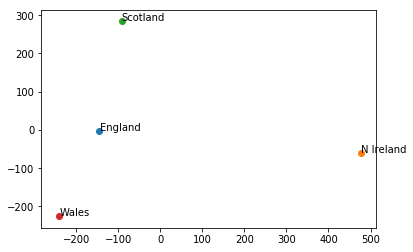

In [2]:
# import panda as pd
# from sklearn.decomposition import PCA
# from sklearn import preprocessing

df = pd.read_excel('pca_uk.xlsx')

X = np.array([df[i].values for i in df.columns if i != 'Features'])
print(X)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

print('')
print('Principal components of 17 features:')
print(X_r)

for k, (i,j) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(i, j)
    plt.text(i+0.3, j+0.3, df.columns[:-1][k])

plt.show()

In [3]:
df.head()

,England,N Ireland,Scotland,Wales,Features
0,375,135,458,475,Alcoholic drinks
1,57,47,53,73,Beverages
2,245,267,242,227,Carcase meat
3,1472,1494,1462,1582,Cereals
4,105,66,103,103,Cheese


In [4]:
df.columns

Index(['England', 'N Ireland', 'Scotland', 'Wales', 'Features'], dtype='object')

['England', 'N Ireland', 'Scotland', 'Wales']


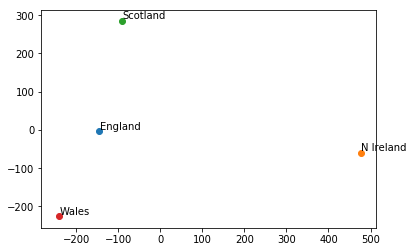

In [5]:
#using a function - thanks, Faith!

def plot_PCA(df, X_R):
    columns = []
    
    for column in df.columns:
        if column != "Features":
            columns.append(column)
            
    print(columns)
    
    for index, (key, value) in enumerate(zip(X_r[:,0], X_r[:,1])):
        plt.scatter(key, value)
        plt.text(key + 1, value + 4, columns[index])
        
plot_PCA(df, X_r)

# 👣 Activity: PCA Steps

Write a function that computes the **principal component** for the iris dataset.

### First, a question: How do we decide how many components to use?
* Aim to **maximize** preserved info while reducing components
* **Lowest number of components** that preserve above **95% of data** (*that's standard*) are the ones used

### Now for the actual activity
1. Subtract **column mean** from **feature matrix**
1. Calculate the **covariance** of **centered matrix**
1. Calculate the ```eigenvalue``` and ```eigenvector``` of covariance matrix
1. Return the first K (two for example) column of matrix multiplication of centered matrix with ```eigenvector``` matrix.

### Once results are obtained,
* Compare the result of custom function with PCA in ```sklearn```
* Calculate the correlation of the first two principal components
* How much of the dataset information is preserved in the first two components?
    * **HINT:** Use ```pca.explained_variance_ratio_```

In [6]:
# from sklearn import datasets
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import numpy as np
# import scipy.stats

iris = datasets.load_iris()

X = iris.data
y = iris.target

#PCA computation by sklearn
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
print('Explained variance:')
print('   ' + str(pca.explained_variance_))
print('Explained variance ratio:')
print('   ' + str(pca.explained_variance_ratio_))
print('Explained variance with cumulative sum:')
print('   ' + str(pca.explained_variance_ratio_.cumsum()))
print('Correlation of PCA Component:')
print('   ' + str(scipy.stats.pearsonr(X_r[:, 0], X_r[:, 1])))

#our function to compare
def PCA_calculation(data, n_comp=2):
    M = np.mean(data, axis=0)
    C = X - M #center columns by subtracting column means
    V = np.cov(C.T) #calculate covariance matrix of centered matrix
    eig_value, eig_vector = np.linalg.eig(V) #eigendecomposition of covariance matrix
    print('eigenvalue: ' + str(eig_value))
    print('eigenvector: ' + str(eig_vector))
    P = np.dot(C, eig_vector)[:, :n_comp]
    return P

PCA_calculation(X, 2)

Explained variance:
   [4.22824171 0.24267075]
Explained variance ratio:
   [0.92461872 0.05306648]
Explained variance with cumulative sum:
   [0.92461872 0.97768521]
Correlation of PCA Component:
   (-1.1769427199659513e-16, 1.0)
eigenvalue: [4.22824171 0.24267075 0.0782095  0.02383509]
eigenvector: [[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,